In [121]:
import numpy as np
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.cluster import KMeans

# Import Dataset

In [214]:
df_merged = pd.read_csv('dataset/merged_df.csv')
df_merged

,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Normalise pct_lapsed, cancel, inforce across rows

In [215]:
# Calculate the row-wise sum
row_sum = df_merged[['pct_lapsed', 'pct_cancel', 'pct_inforce']].sum(axis=1)

# Normalize each column and create new columns
df_merged['norm_pct_lapsed'] = df_merged['pct_lapsed'] / row_sum
df_merged['norm_pct_cancel'] = df_merged['pct_cancel'] / row_sum
df_merged['norm_pct_inforce'] = df_merged['pct_inforce'] / row_sum

df_merged

,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise,norm_pct_lapsed,norm_pct_cancel,norm_pct_inforce
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.443561,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Normalise Annual Premium Converted by dividing with Count

In [216]:
# Normalize annual_prem by dividing with count
df_merged['norm_annual_prem'] = df_merged['annual_premium_cnvrt'] / df_merged['cnt_converted']

# Display the first few rows to verify
print(df_merged[['annual_premium_cnvrt', 'cnt_converted', 'norm_annual_prem']].head())
df_merged

   annual_premium_cnvrt  cnt_converted  norm_annual_prem
0              205629.3          629.0        326.914626
1              205629.3          629.0        326.914626
2              205629.3          629.0        326.914626
3              205629.3          629.0        326.914626
4              205629.3          629.0        326.914626


,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise,norm_pct_lapsed,norm_pct_cancel,norm_pct_inforce,norm_annual_prem
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.144674,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Normalise Count by dividing with Tenure

### Convert tenure to years first

In [217]:
df_merged['tenure_years'] = df_merged['agent_tenure'] / 12
df_merged

,chdrnum,agntnum,securityno,occdate,annual_premium,product,flg_inforce,flg_lapsed,flg_expire,product_grp,...,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise,norm_pct_lapsed,norm_pct_cancel,norm_pct_inforce,norm_annual_prem,tenure_years
0,PID:4,AIN:0,CIN:1677,2020-06-15,1187.0,prod_8,1.0,0.0,0.0,PG:0,...,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626,1.5
1,PID:2,AIN:0,CIN:2974,2020-06-11,144.0,prod_8,0.0,1.0,0.0,PG:0,...,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626,1.5
2,PID:11,AIN:0,CIN:3570,2021-04-07,48.0,prod_8,0.0,1.0,0.0,PG:0,...,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626,1.5
3,PID:10,AIN:0,CIN:5147,2020-06-11,480.0,prod_8,1.0,0.0,0.0,PG:0,...,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626,1.5
4,PID:5,AIN:0,CIN:7339,2020-04-07,0.0,prod_6,1.0,0.0,0.0,PG:0,...,0.112878,0.034976,0.020668,7.0,['prod_7' 'prod_8' 'prod_0' 'prod_9'],0.340637,0.162489,0.496875,326.914626,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29643,NaN,NaN,CIN:8098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29644,NaN,NaN,CIN:9384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29645,NaN,NaN,CIN:9626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29646,NaN,NaN,CIN:9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Divide Count by Tenure in years

In [218]:
df_merged['count_per_year'] = df_merged['cnt_converted'] / df_merged['tenure_years']
print(df_merged['count_per_year'].head())

0    419.333333
1    419.333333
2    419.333333
3    419.333333
4    419.333333
Name: count_per_year, dtype: float64


### Check count_per_year correlation with norm_annual_prem

In [219]:
# Remove rows with NA values in 'count_per_year' and 'norm_annual_prem'
correlation = df_merged[['count_per_year', 'norm_annual_prem']].dropna().corr().iloc[0, 1]

# Display the correlation value
print(f"Correlation between count_per_year and norm_annual_prem (ignoring NA values): {correlation}")


Correlation between count_per_year and norm_annual_prem (ignoring NA values): -0.06942740421082773


# Analyze outlier for mean annual premium

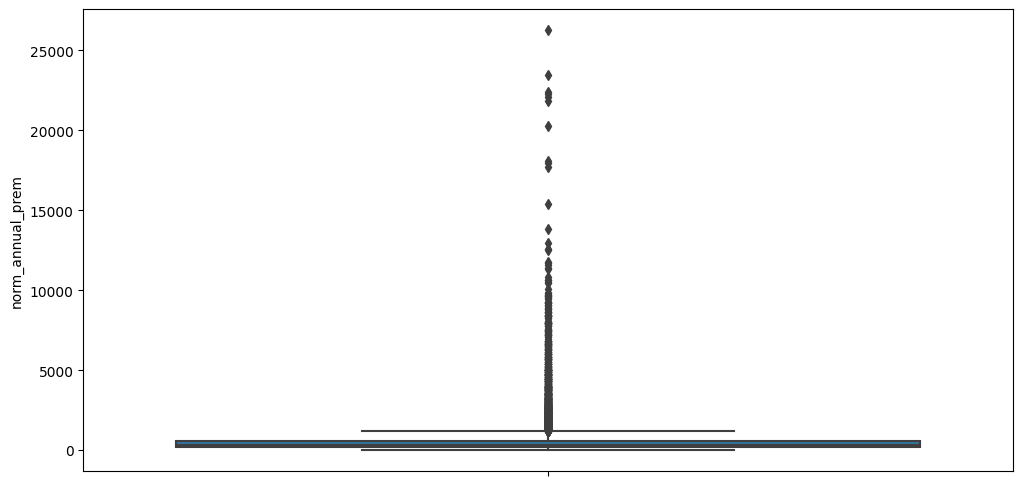

In [220]:
agent_norm_prem = df_merged.groupby('agntnum')['norm_annual_prem'].mean().reset_index()

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='norm_annual_prem', data=agent_norm_prem)

plt.show()

### Figure out why some insurance agents have very high mean annual premium

In [221]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_merged['norm_annual_prem'].quantile(0.25)
Q3 = df_merged['norm_annual_prem'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds (3 * IQR for stricter detection)
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter outliers
outliers = df_merged[(df_merged['norm_annual_prem'] < lower_bound) | 
                       (df_merged['norm_annual_prem'] > upper_bound)]


In [222]:
# Calculate the correlation matrix for all numeric columns
columns_to_compare = ['norm_annual_prem', 'pct_AG01_lt20', 'pct_AG02_20to24', 'pct_AG03_25to29', 'pct_AG04_30to34', 'pct_AG05_35to39', 'pct_AG06_40to44',
                      'pct_AG07_45to49', 'pct_AG08_50to54', 'pct_AG09_55to59', 'pct_AG10_60up', 'economic_status', 'age']
correlation_matrix = outliers[columns_to_compare].corr()

# Display the correlation matrix
print(correlation_matrix)


                  norm_annual_prem  pct_AG01_lt20  pct_AG02_20to24  \
norm_annual_prem          1.000000      -0.098083        -0.083653   
pct_AG01_lt20            -0.098083       1.000000         0.077427   
pct_AG02_20to24          -0.083653       0.077427         1.000000   
pct_AG03_25to29          -0.046424      -0.015068         0.225259   
pct_AG04_30to34          -0.077008      -0.048123         0.028284   
pct_AG05_35to39          -0.172384      -0.037437        -0.035408   
pct_AG06_40to44          -0.142104       0.025381        -0.096557   
pct_AG07_45to49          -0.057735       0.094117        -0.117643   
pct_AG08_50to54          -0.027748      -0.019940        -0.128501   
pct_AG09_55to59           0.025453      -0.029326        -0.099663   
pct_AG10_60up             0.182866      -0.102457        -0.166294   
economic_status           0.172094      -0.058887        -0.078605   
age                      -0.013930       0.003215        -0.131751   

                  p

# Analyze average premium paid for each product

In [223]:
# Group by 'product' and calculate mean and median for 'annual_prem'
premium_stats = df_merged.groupby('product')['annual_premium'].agg(['mean', 'median'])
economic_stats = df_merged.groupby('product')['family_size'].agg(['mean', 'median'])

# Display the results
print(premium_stats)
print(economic_stats)

                mean  median
product                     
prod_0      0.000000     0.0
prod_2    200.384519     0.0
prod_4   4226.586381  2000.0
prod_6    393.445844   240.0
prod_7    253.483471    71.2
prod_8    307.527452     0.0
prod_9   3648.155414     0.0
              mean  median
product                   
prod_0   46.500000    47.0
prod_2   52.306242    54.0
prod_4   56.012903    58.0
prod_6   55.794228    57.0
prod_7   60.069869    63.0
prod_8   57.020990    59.0
prod_9   57.715821    60.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_64069/2231902258.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


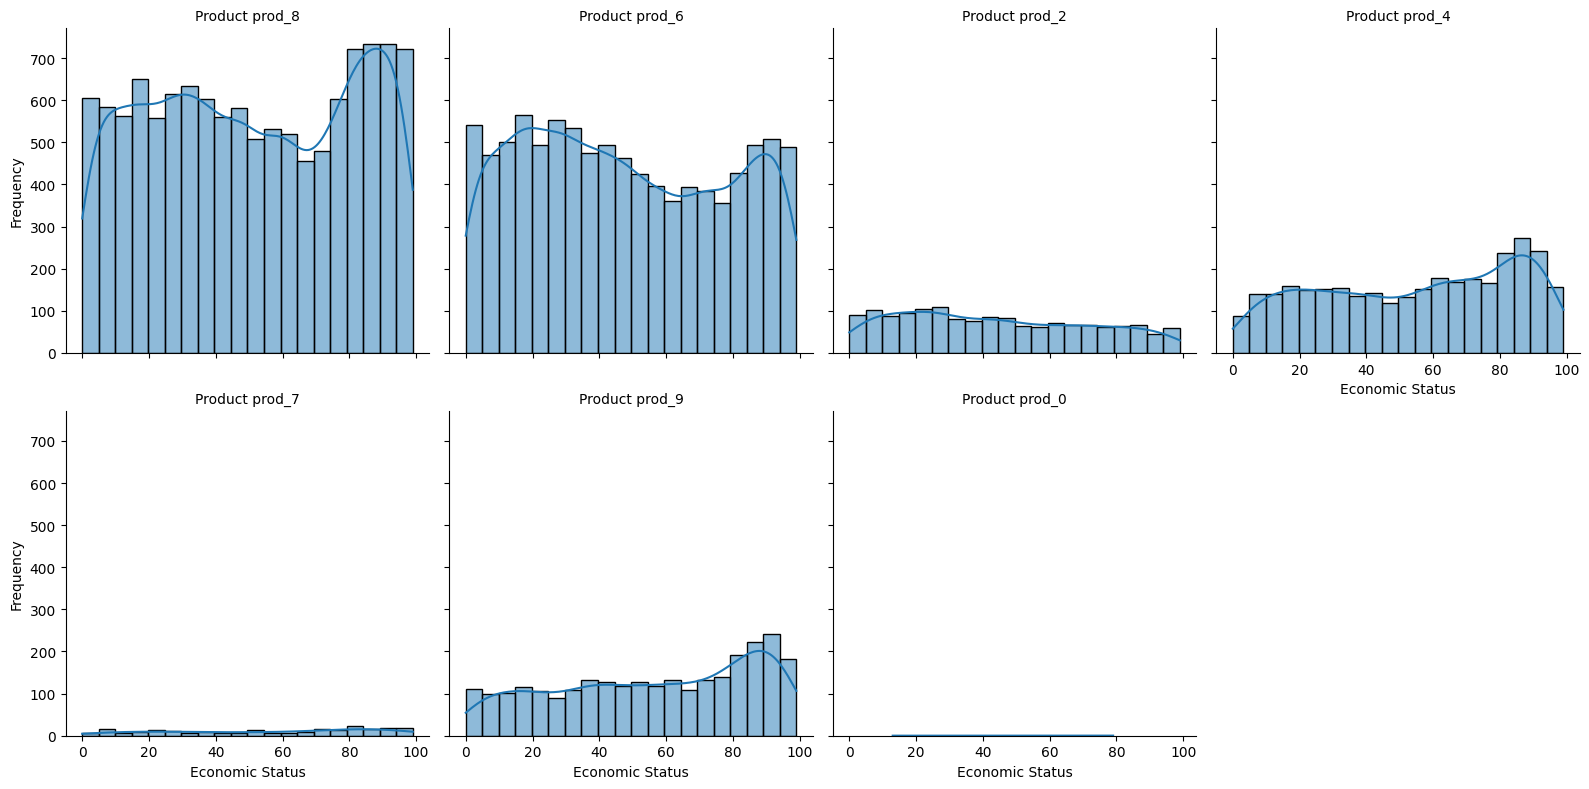

In [224]:
g = sns.FacetGrid(df_merged, col="product", col_wrap=4, height=4)
g.map(sns.histplot, "economic_status", kde=True, bins=20)

# Add titles and labels
g.set_axis_labels('Economic Status', 'Frequency')
g.set_titles('Product {col_name}')

# Show the plot
plt.tight_layout()
plt.show()

In [225]:
# Group by product and get the five-number summary for 'annual_prem'
five_number_summary = df_merged.groupby('product')['annual_premium'].describe()[['min', '25%', '50%', '75%', 'max']]

# Display the result
print(five_number_summary)

         min    25%     50%     75%           max
product                                          
prod_0   0.0    0.0     0.0     0.0       0.00000
prod_2   0.0    0.0     0.0   519.0    3290.00000
prod_4   0.0    0.0  2000.0  5000.0  100195.00000
prod_6   0.0  133.0   240.0   462.0    8667.00000
prod_7   0.0    0.0    71.2   263.5    3456.00000
prod_8   0.0    0.0     0.0   324.0   49377.55686
prod_9   0.0    0.0     0.0   882.0  300039.60000


# PCA for Agent Performance

### Select distinct agents only

In [226]:
features = ['norm_pct_lapsed', 'norm_pct_cancel', 'norm_pct_inforce', 'count_per_year', 'norm_annual_prem']
df_unique_agents = df_merged.groupby('agntnum')[features].mean().reset_index()

### Scale the features

In [227]:
# Select the relevant columns for PCA and drop rows with missing values
df_pca_pre = df_unique_agents[features].dropna()

# Remove rows where any value is infinity or excessively large
df_pca_pre = df_pca_pre[~df_pca_pre.isin([np.inf, -np.inf]).any(axis=1)]  # Remove rows with infinity
df_pca_pre = df_pca_pre[(df_pca_pre < 1e100).all(axis=1)]  # Remove rows with values larger than 1e100

# Apply StandardScaler to all columns except 'count_per_year'
scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df_pca.drop(columns=['count_per_year', 'norm_annual_prem']))

# Apply RobustScaler to 'count_per_year'
robust_scaler = QuantileTransformer()
#scaled_count_per_year = robust_scaler.fit_transform(df_pca[['count_per_year']])
#scaled_norm_annual_prem = robust_scaler.fit_transform(df_pca[['norm_annual_prem']])
scaled_data = robust_scaler.fit_transform(df_pca_pre)

# Combine the scaled data back together
scaled_df = pd.DataFrame(scaled_data, columns=['norm_pct_lapsed', 'norm_pct_cancel', 'norm_pct_inforce', 'count_per_year', 'norm_annual_prem'])
# scaled_df['count_per_year'] = scaled_count_per_year
# scaled_df['norm_annual_prem'] = scaled_norm_annual_prem

# Display the scaled dataframe
print(scaled_df)

       norm_pct_lapsed  norm_pct_cancel  norm_pct_inforce  count_per_year  \
0             0.726442         0.806780          0.243487        0.933385   
1             0.743802         0.263893          0.313594        0.947948   
2             0.726939         0.659139          0.271779        0.808809   
3             0.553713         0.557603          0.451410        0.729730   
4             0.000000         0.796964          0.653986        0.975036   
...                ...              ...               ...             ...   
10105         0.000000         0.000000          1.000000        0.060060   
10106         0.813348         0.990669          0.000000        0.296296   
10107         1.000000         0.000000          0.000000        0.014572   
10108         0.715319         0.996293          0.171917        0.072167   
10109         0.832706         0.979796          0.000000        0.020501   

       norm_annual_prem  
0              0.462466  
1              0.139989

### Apply PCA   

In [228]:
# Initialize PCA with 2 components (adjust if needed)
pca = PCA(n_components=2)

# Fit and transform the data to 2D
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame for easier handling
df_pca = pd.DataFrame(pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Optional: Add the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.45066903 0.25415268]


### Loadings

In [229]:
loadings = pd.DataFrame(pca.components_, columns=scaled_df.columns)
print(loadings)

   norm_pct_lapsed  norm_pct_cancel  norm_pct_inforce  count_per_year  \
0         0.694174         0.057550         -0.622835       -0.345213   
1        -0.091150         0.857901         -0.199650        0.215174   

   norm_annual_prem  
0          0.087836  
1         -0.411749  


### Plot Explained Variance

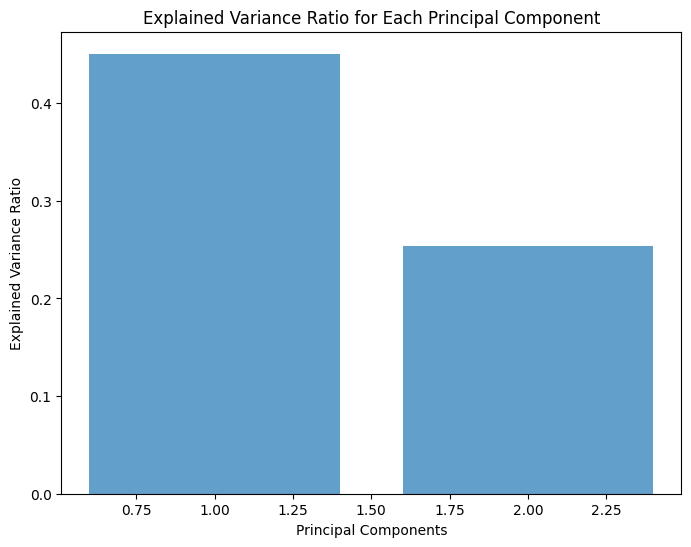

In [230]:
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Apply k-Means

In [231]:
# Apply KMeans with a specific number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)

# Get the labels (cluster assignments)
df_pca['Cluster'] = kmeans.labels_

# Print cluster centers
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[ 0.00676232 -0.25324744]
 [ 0.49321047  0.3198461 ]
 [-0.61312062 -0.20818061]
 [ 0.58866905 -0.3907717 ]
 [-0.25525561  0.29093582]]


### Elbow method

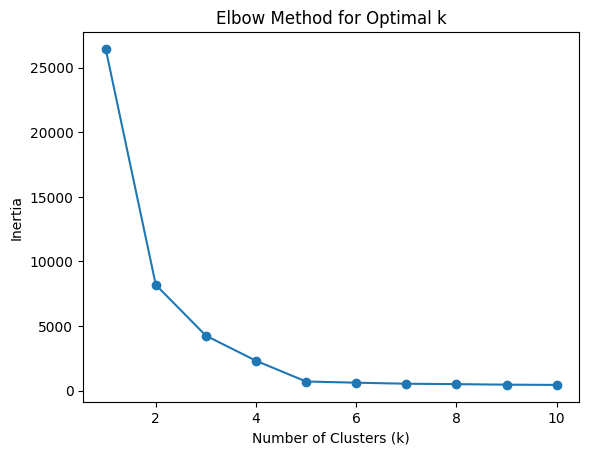

In [232]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):  # Try k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia to observe the "elbow"
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Visualise cluster

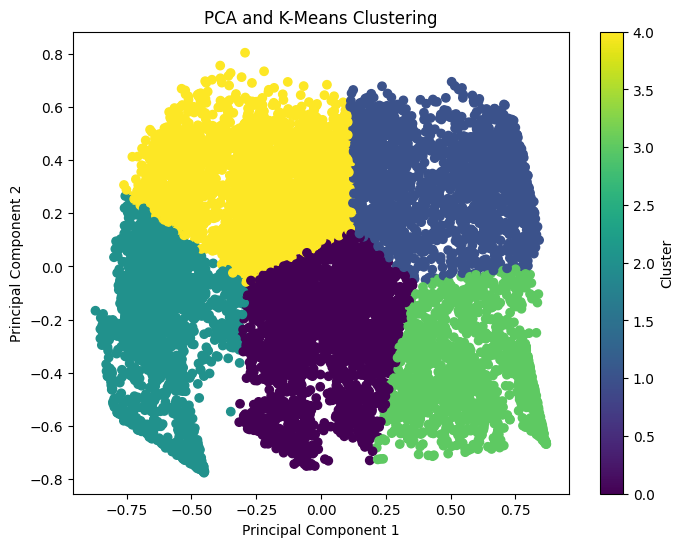

In [233]:
# Scatter plot of the 2D PCA results with K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Labelling each agent

In [289]:
# Assuming 'agent_id' column is in your original dataframe and 'cluster' is assigned after clustering
scaled_df['agntnum'] = df_unique_agents['agntnum']  # Ensure agent_id is in the dataframe
scaled_df['cluster_performance'] = df_pca['Cluster']  # Assign cluster labels

# Now you can see the agent's ID and the cluster they belong to
print(scaled_df[['agntnum', 'cluster_performance']])
scaled_df

        agntnum  cluster_performance
0         AIN:0                    4
1         AIN:1                    0
2        AIN:10                    4
3       AIN:100                    2
4      AIN:1000                    2
...         ...                  ...
10105  AIN:9978                    3
10106  AIN:9979                    4
10107   AIN:998                    1
10108  AIN:9980                    4
10109  AIN:9981                    4

[10110 rows x 2 columns]


,norm_pct_lapsed,norm_pct_cancel,norm_pct_inforce,count_per_year,norm_annual_prem,agntnum,cluster,cluster_performance
0,0.726442,0.806780,0.243487,0.933385,0.462466,AIN:0,1,4
1,0.743802,0.263893,0.313594,0.947948,0.139989,AIN:1,0,0
2,0.726939,0.659139,0.271779,0.808809,0.233232,AIN:10,1,4
3,0.553713,0.557603,0.451410,0.729730,0.566770,AIN:100,4,2
4,0.000000,0.796964,0.653986,0.975036,0.173220,AIN:1000,4,2
...,...,...,...,...,...,...,...,...
10105,0.000000,0.000000,1.000000,0.060060,0.991633,AIN:9978,2,3
10106,0.813348,0.990669,0.000000,0.296296,0.786732,AIN:9979,1,4
10107,1.000000,0.000000,0.000000,0.014572,0.652117,AIN:998,3,1
10108,0.715319,0.996293,0.171917,0.072167,0.351932,AIN:9980,1,4


Cluster 0: balanced perforamce (neither excelling nor underperforming significantly)

Cluster 1: agents with high lapse and high cancellations (struggling to retain customers, targetting risky clients)

Cluster 2: High lapse, fewer cancellations (Acquire clients quickly, but unable to retain)

Cluster 3: Low lapse, moderate cancellation (Experienced agents, good retention)

Cluster 4: Low lapse, Low cancellation (top performers)

# PCA for Agent Targets

### Extract Data

In [293]:
# Select demographic feature columns
demographic_features = [col for col in df_merged.columns if col.startswith('pct_SX') or col.startswith('pct_AG')]

# Keep 'agntnum' and the selected demographic features, then drop missing values
df_demo = df_merged[['agntnum'] + demographic_features].dropna()

# Group by 'agntnum' and compute the mean of demographic features
df_demo_grouped = df_demo.groupby('agntnum')[demographic_features].mean().reset_index()
df_demo_grouped = df_demo_grouped.drop(columns=['pct_SX0_unknown'])

# Display the grouped DataFrame
df_demo_grouped.head()

,agntnum,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up
0,AIN:0,0.537361,0.449921,0.000000,0.000000,0.084261,0.058824,0.077901,0.443561,0.144674,0.112878,0.034976,0.020668
1,AIN:1,0.604167,0.386905,0.002976,0.017857,0.026786,0.505952,0.258929,0.148810,0.017857,0.000000,0.000000,0.000000
2,AIN:10,0.447489,0.520548,0.000000,0.159817,0.178082,0.168950,0.182648,0.054795,0.164384,0.045662,0.000000,0.000000
3,AIN:100,0.818182,0.045455,0.000000,0.000000,0.318182,0.113636,0.386364,0.000000,0.000000,0.000000,0.000000,0.000000
4,AIN:1000,0.440389,0.076642,0.002433,0.029197,0.040146,0.130170,0.043796,0.065693,0.034063,0.012165,0.007299,0.015815


### Standardise the data

In [294]:
# Standardize demographic data (excluding 'agntnum')
scaler = QuantileTransformer()
scaled_demo = scaler.fit_transform(df_demo_grouped.drop(columns=['agntnum']))

# Convert the scaled data back into a DataFrame with the same column names
scaled_demo_df = pd.DataFrame(scaled_demo, columns=df_demo_grouped.drop(columns=['agntnum']).columns)

# Display the scaled DataFrame
print(scaled_demo_df.head())
scaled_demo_df

   pct_SX1_male  pct_SX2_female  pct_AG01_lt20  pct_AG02_20to24  \
0      0.540414        0.434487       0.000000         0.000000   
1      0.704934        0.290430       0.745892         0.542543   
2      0.315474        0.625333       0.000000         0.922630   
3      0.946446        0.028605       0.000000         0.000000   
4      0.299264        0.032050       0.739760         0.618705   

   pct_AG03_25to29  pct_AG04_30to34  pct_AG05_35to39  pct_AG06_40to44  \
0         0.568445         0.203203         0.308232         0.946587   
1         0.366757         0.901232         0.783013         0.533008   
2         0.783019         0.461618         0.609647         0.262698   
3         0.902616         0.321660         0.927928         0.000000   
4         0.414479         0.361080         0.221718         0.290092   

   pct_AG07_45to49  pct_AG08_50to54  pct_AG09_55to59  pct_AG10_60up  
0         0.751684         0.793049         0.629008       0.666684  
1         0.272579

,pct_SX1_male,pct_SX2_female,pct_AG01_lt20,pct_AG02_20to24,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up
0,0.540414,0.434487,0.000000,0.000000,0.568445,0.203203,0.308232,0.946587,0.751684,0.793049,0.629008,0.666684
1,0.704934,0.290430,0.745892,0.542543,0.366757,0.901232,0.783013,0.533008,0.272579,0.000000,0.000000,0.000000
2,0.315474,0.625333,0.000000,0.922630,0.783019,0.461618,0.609647,0.262698,0.798799,0.533113,0.000000,0.000000
3,0.946446,0.028605,0.000000,0.000000,0.902616,0.321660,0.927928,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.299264,0.032050,0.739760,0.618705,0.414479,0.361080,0.221718,0.290092,0.336264,0.336170,0.400585,0.621325
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,0.124124,0.882883,0.000000,0.000000,0.000000,0.000000,0.000000,0.990991,0.534034,0.702703,0.000000,0.880380
10125,0.172551,0.834835,0.000000,0.000000,0.925889,0.796554,0.000000,0.000000,0.000000,0.789289,0.642417,0.911912
10126,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10127,0.081081,0.923924,0.000000,0.000000,0.000000,0.927124,0.000000,0.000000,0.000000,0.988989,0.000000,0.000000


### PCA

In [295]:
# Initialize PCA with 2 components (adjust if needed)
pca_target = PCA(n_components=5)

# Fit and transform the data to 2D
pca_target_data = pca_target.fit_transform(scaled_demo_df)

# Convert PCA results to DataFrame for easier handling
df_pca_target = pd.DataFrame(pca_target_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Optional: Add the explained variance ratio for each principal component
explained_variance_target = pca_target.explained_variance_ratio_
print(f"Explained variance ratio: {(explained_variance_target)}")

Explained variance ratio: [0.25120264 0.16578146 0.11863938 0.09844356 0.08206114]


### Explained Variance Plot

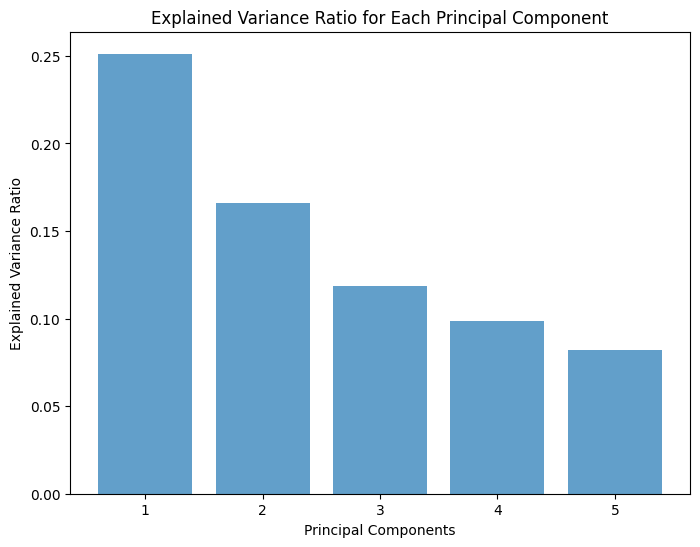

In [296]:
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_target) + 1), explained_variance_target, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Loadings

In [297]:
loadings = pd.DataFrame(pca_target.components_, columns=scaled_demo_df.columns)
print(loadings)

   pct_SX1_male  pct_SX2_female  pct_AG01_lt20  pct_AG02_20to24  \
0     -0.151075        0.149823       0.375632         0.270314   
1      0.196729       -0.200682       0.329969         0.585803   
2      0.599704       -0.598211       0.104066        -0.087031   
3     -0.153215        0.160293       0.581755         0.008528   
4      0.228210       -0.221701       0.109027        -0.238167   

   pct_AG03_25to29  pct_AG04_30to34  pct_AG05_35to39  pct_AG06_40to44  \
0         0.089649        -0.189921        -0.065179         0.151183   
1         0.555097         0.110345        -0.083147        -0.207666   
2        -0.104511        -0.205989        -0.007408         0.307760   
3        -0.143115         0.140658         0.535689         0.368590   
4        -0.085796         0.522371         0.330469        -0.180876   

   pct_AG07_45to49  pct_AG08_50to54  pct_AG09_55to59  pct_AG10_60up  
0         0.306349         0.403323         0.448984       0.459611  
1        -0.228042

### Apply k Means

In [298]:
# Apply KMeans with a specific number of clusters (e.g., 3)
kmeans_target = KMeans(n_clusters=5, random_state=42)
kmeans_target.fit(df_pca_target)

# Get the labels (cluster assignments)
df_pca_target['Cluster'] = kmeans_target.labels_

# Print cluster centers
print("Cluster Centers (Centroids):")
print(kmeans_target.cluster_centers_)

Cluster Centers (Centroids):
[[ 0.39990129 -0.3746458  -0.00514325 -0.31340408  0.01283186]
 [-0.62180849 -0.16504021  0.38762706  0.03772109  0.07339652]
 [ 0.57874852  0.28531947  0.06610404  0.31224027  0.06818614]
 [-0.33348568  0.55187914 -0.10387766 -0.24634197 -0.1281566 ]
 [-0.45393432 -0.37695028 -0.3551728   0.20333792 -0.04839622]]


### Elbow Method

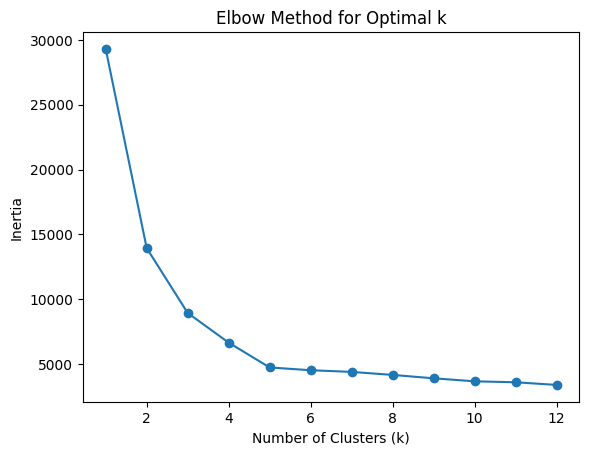

In [299]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 13):  # Try k from 1 to 13
    kmeans_target = KMeans(n_clusters=k, random_state=42)
    kmeans_target.fit(df_pca_target)
    inertia.append(kmeans_target.inertia_)

# Plot the inertia to observe the "elbow"
plt.plot(range(1, 13), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Visualise Cluster

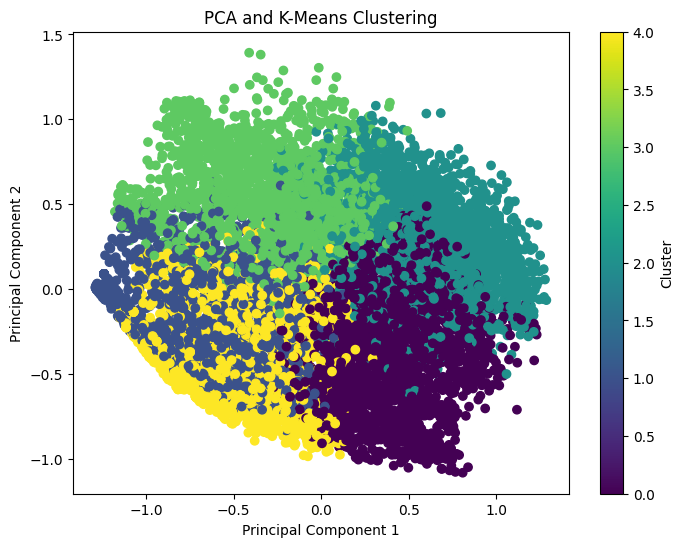

In [300]:
# Scatter plot of the 2D PCA results with K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_target['PC1'], df_pca_target['PC2'], c=df_pca_target['Cluster'], cmap='viridis')
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

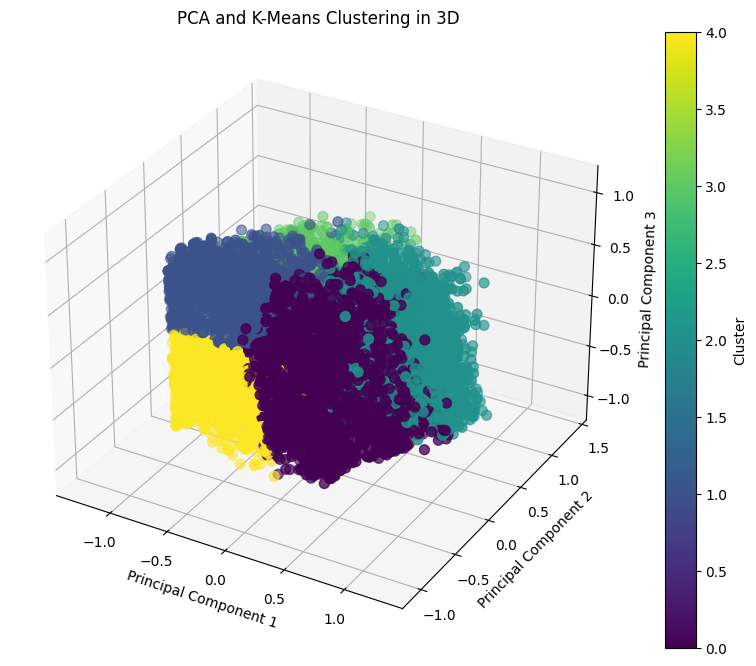

In [301]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_pca_target contains the first three principal components (PC1, PC2, and PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on clusters
sc = ax.scatter(df_pca_target['PC1'], df_pca_target['PC2'], df_pca_target['PC3'], 
                c=df_pca_target['Cluster'], cmap='viridis', s=50)

# Labels and title
ax.set_title('PCA and K-Means Clustering in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add color bar
plt.colorbar(sc, label='Cluster')

plt.show()


### Labelling each agent

In [302]:
# Assuming 'agent_id' column is in your original dataframe and 'cluster' is assigned after clustering
scaled_demo_df['agntnum'] = df_demo_grouped['agntnum']  # Ensure agent_id is in the dataframe
scaled_demo_df['cluster_demographics'] = df_pca_target['Cluster']  # Assign cluster labels

# Now you can see the agent's ID and the cluster they belong to
print(scaled_demo_df[['agntnum', 'cluster_demographics']])

        agntnum  cluster_demographics
0         AIN:0                     0
1         AIN:1                     1
2        AIN:10                     3
3       AIN:100                     1
4      AIN:1000                     2
...         ...                   ...
10124  AIN:9995                     0
10125  AIN:9996                     0
10126  AIN:9997                     4
10127  AIN:9998                     4
10128  AIN:9999                     1

[10129 rows x 2 columns]


### Combine the 2 clustering

In [303]:
demograph_df = scaled_demo_df[['agntnum', 'cluster_demographics']]
performace_df = scaled_df[['agntnum', 'cluster_performance']]
df_cluster_combined = pd.merge(demograph_df, performace_df, on='agntnum', how='inner')
df_cluster_combined

,agntnum,cluster_demographics,cluster_performance
0,AIN:0,0,4
1,AIN:1,1,0
2,AIN:10,3,4
3,AIN:100,1,2
4,AIN:1000,2,2
...,...,...,...
10105,AIN:9978,1,3
10106,AIN:9979,4,4
10107,AIN:998,1,1
10108,AIN:9980,3,4


Cluster 0: Focuses on clients in their late 20s to early 30s. Likely serves a balanced age distribution with a slight bias toward middle age, with fewer older clients.

Cluster 1: Primarily serves female clients and has a high proportion of clients in their late 20s. It has a low percentage of elderly clients.

Cluster 2: Focuses on younger clients, especially those in their early 20s, but still includes a moderate proportion of older clients in their late 50s.

Cluster 3: Primarily serves middle-aged clients, especially those in the 40s and 50s. There is likely a strong focus on clients aged 35-49.

Cluster 4: Primarily serves older clients, with a high concentration of those aged 55+, especially those in their 60s.